# Stock Return Prediction

Notebook ini berguna untuk menghitung nilai return pada perusahaan Microsoft berdasarkan data/ aset yang berkorelasi berdasarkan data historis

## 1. Problem Definition

Pada algoritma supervised machine learning, kita akan menghitung nilai return harga saham berdasarkan variabel yang akan diprediksi.  
Stocks : IBM (IBM) dan (GOOGL)
Currency : USD/JPY and GBP/USD
Indices : S&P 500, Dow Jones and VIX

## 2. Getting Started - Loading the data and python packages

### 2.1 Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
# import pandas_datareader.yahoo.daily as yahoo
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')


### 2.2 Loading the Data
Mengambil data website menggunakan website data reader

In [3]:
import yfinance as yf
from datetime import datetime, timedelta
from pandas_datareader.fred import FredReader

# fred = FredReader(api_key='YOUR_API_KEY_HERE')

# get data for the past year
day = datetime(2022, 12, 31)
start = day - timedelta(days = 365.3*10)
end = day


In [4]:
stk_data = yf.download(
    tickers="MSFT IBM GOOGL",
    start=start,
    end=end,
)

[*********************100%***********************]  3 of 3 completed


In [5]:
stk_data

Adj Close                              Close              \
                GOOGL         IBM        MSFT      GOOGL         IBM   
Date                                                                   
2012-12-31  17.702202  123.926445   22.024323  17.702202  183.126190   
2013-01-02  18.099348  127.031853   22.774685  18.099348  187.715103   
2013-01-03  18.109859  126.333160   22.469589  18.109859  186.682602   
2013-01-04  18.467718  125.505013   22.049061  18.467718  185.458893   
2013-01-07  18.387136  124.955116   22.007830  18.387136  184.646271   
...               ...         ...         ...        ...         ...   
2022-12-23  89.230003  141.649994  238.729996  89.230003  141.649994   
2022-12-27  87.389999  142.419998  236.960007  87.389999  142.419998   
2022-12-28  86.019997  140.020004  234.529999  86.019997  140.020004   
2022-12-29  88.449997  141.059998  241.009995  88.449997  141.059998   
2022-12-30  88.230003  140.889999  239.820007  88.230003  140.889999   

                             High                                Low  \
                  MSFT      GOOGL         IBM        MSFT      GOOGL   
Date                                                                   
2012-12-31   26.709999  17.782032  183.250473   26.770000  17.417418   
2013-01-02   27.620001  18.193193  187.715103   27.730000  17.931683   
2013-01-03   27.250000  18.316566  187.657745   27.650000  18.036036   
2013-01-04   26.740000  18.555305  185.908218   27.340000  18.210211   
2013-01-07   26.690001  18.503002  185.258133   26.879999  18.282784   
...                ...        ...         ...         ...        ...   
2022-12-23  238.729996  89.550003  141.860001  238.869995  87.070000   
2022-12-27  236.960007  88.940002  142.720001  238.929993  87.010002   
2022-12-28  234.529999  88.040001  142.809998  239.720001  85.940002   
2022-12-29  241.009995  88.849998  142.259995  241.919998  86.610001   
2022-12-30  239.820007  88.300003  140.899994  239.960007  86.570000   

                                         Open                          \
                   IBM        MSFT      GOOGL         IBM        MSFT   
Date                                                                    
2012-12-31  180.535370   26.370001  17.517517  180.908218   26.590000   
2013-01-02  185.277252   27.150000  18.003504  185.554489   27.250000   
2013-01-03  185.889099   27.160000  18.141392  187.065002   27.629999   
2013-01-04  184.302109   26.730000  18.251753  185.650101   27.270000   
2013-01-07  183.881454   26.639999  18.404655  184.894836   26.770000   
...                ...         ...        ...         ...         ...   
2022-12-23  139.600006  233.940002  87.110001  140.589996  236.110001   
2022-12-27  141.229996  235.830002  88.800003  141.729996  238.699997   
2022-12-28  139.949997  234.169998  86.980003  142.399994  236.889999   
2022-12-29  140.449997  235.649994  86.620003  140.580002  235.649994   
2022-12-30  139.449997  236.660004  86.980003  140.539993  238.210007   

               Volume                     
                GOOGL      IBM      MSFT  
Date                                      
2012-12-31   79816104  4900405  42749500  
2013-01-02  101550348  4428869  52899300  
2013-01-03   92635272  3812356  48294400  
2013-01-04  110429460  3535689  52521100  
2013-01-07   66161772  2993966  37110400  
...               ...      ...       ...  
2022-12-23   23003000  2092500  21207000  
2022-12-27   20097300  2742400  16688600  
2022-12-28   19523200  2539500  17457100  
2022-12-29   23333500  2337200  19770700  
2022-12-30   23964900  2858000  21930800  

[2519 rows x 18 columns]

In [5]:
stk_data.describe()

Adj Close                                  Close               \
             GOOGL          IBM         MSFT        GOOGL          IBM   
count  2519.000000  2519.000000  2519.000000  2519.000000  2519.000000   
mean     59.501631   115.531831   117.277268    59.501631   145.315893   
std      34.635871    11.580960    90.875466    34.635871    22.195638   
min      17.589338    78.906219    21.818174    17.589338    90.602295   
25%      30.315691   108.218147    41.439857    30.315691   129.705002   
50%      51.937000   114.409492    80.940384    51.937000   140.210327   
75%      73.954998   124.654472   197.079536    73.954998   156.477058   
max     149.838501   150.570007   339.924835   149.838501   206.309753   

                           High                                    Low  \
              MSFT        GOOGL          IBM         MSFT        GOOGL   
count  2519.000000  2519.000000  2519.000000  2519.000000  2519.000000   
mean    121.780453    60.096972   146.421499   122.961751    58.882300   
std      89.867171    35.052094    22.139434    90.848914    34.221764   
min      26.459999    17.651152    93.441681    26.750000    17.405405   
25%      47.000000    30.445000   130.562027    47.445000    30.084300   
50%      85.949997    52.571499   141.166351    86.510002    51.314999   
75%     201.605003    74.413750   157.686417   203.799995    72.917500   
max     343.109985   151.546494   206.405350   349.670013   148.899002   

                                        Open                            \
               IBM         MSFT        GOOGL          IBM         MSFT   
count  2519.000000  2519.000000  2519.000000  2519.000000  2519.000000   
mean    144.201705   120.474140    59.499778   145.296356   121.746872   
std      22.245812    88.800859    34.647257    22.175645    89.867462   
min      86.577438    26.280001    17.517517    90.439774    26.490000   
25%     128.723709    46.535000    30.300913   129.677040    46.934999   
50%     139.254303    85.400002    51.999500   140.248566    86.199997   
75%     155.411087   197.625000    73.687252   156.701721   200.235001   
max     204.875717   342.200012   151.250000   205.908218   344.619995   

             Volume                              
              GOOGL           IBM          MSFT  
count  2.519000e+03  2.519000e+03  2.519000e+03  
mean   4.284923e+07  4.846626e+06  3.225361e+07  
std    2.700565e+07  2.825482e+06  1.680896e+07  
min    9.312000e+06  1.247878e+06  7.425600e+06  
25%    2.680900e+07  3.321734e+06  2.240770e+07  
50%    3.439800e+07  4.149587e+06  2.832220e+07  
75%    4.897200e+07  5.393547e+06  3.673285e+07  
max    4.621933e+08  3.981442e+07  2.484285e+08

In [6]:
# df = fred.get_series('SP500', start=start, end=end)
# df.head()

ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

ccy_data = FredReader(
    symbols=ccy_tickers, 
    start=start, 
    end=end,
    )
idx_data = FredReader(
    symbols=idx_tickers, 
    start=start, 
    end=end,
    )


In [8]:
ccy_data.read().tail()

,DEXJPUS,DEXUSUK
DATE,,
2022-12-26,NaN,NaN
2022-12-27,133.43,1.2032
2022-12-28,134.27,1.2034
2022-12-29,133.16,1.2060
2022-12-30,131.81,1.2077


In [8]:
idx_data.read().describe()

,SP500,DJIA,VIXCLS
count,2505.000000,2505.000000,2524.000000
mean,2749.308731,23482.173429,17.876878
std,870.208094,6503.584563,7.359488
min,1487.850000,13712.210000,9.140000
25%,2053.190000,17603.870000,13.020000
50%,2594.380000,23526.180000,15.600000
75%,3283.150000,27940.470000,21.105000
max,4796.560000,36799.650000,82.690000


In [9]:
return_period = 5

Kita memerlukan series untuk memprediksi. Kita akan menggunakan pengembalian mingguan, kareana stock market buka dari senin-jumat maka kita akan menggunakan metode 5 hari kerja.

In [10]:
Y = np.log(stk_data.loc[:, 'Adj Close']['MSFT']).diff(
    return_period).shift(-return_period)
Y.name = Y.name +'_pred'
# Y.describe()


In [11]:
X1 = stk_data.loc[:, 'Adj Close']
# X12 = X1.GOOGL
# X13 = X1.IBM
# X1 = pd.concat([X12, X13], axis=1)
X1.drop(columns=['MSFT'], inplace=True)
# X1.describe()
X1 = np.log(X1).diff(return_period)
X1.columns = X1.columns

In [12]:
ccy_data = ccy_data.read()
idx_data = idx_data.read()

In [13]:
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)


In [14]:
X2.isna().value_counts()

DEXJPUS  DEXUSUK
False    False      2397
True     True        213
dtype: int64

In [15]:
X4 = pd.concat([np.log(stk_data.loc[:, 'Adj Close']['MSFT']) .diff(i) for i in [
               return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']


In [16]:
X4.isna().value_counts()

MSFT_DT  MSFT_3DT  MSFT_6DT  MSFT_12DT
False    False     False     False        2459
dtype: int64

In [17]:
X = pd.concat([X1, X2, X3, X4], axis=1)

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

## Exploratory Data Analysis

### 3.1 Descriptive Statistics

In [18]:
pd.set_option("display.precision", 3)
dataset.describe()


,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,464.000,464.000,4.640e+02,4.640e+02,4.640e+02,464.000,464.000,4.640e+02,464.000,464.000,464.000,4.640e+02
mean,0.005,0.003,4.756e-05,6.047e-04,-5.850e-04,0.002,0.001,-6.200e-04,0.005,0.015,0.029,5.847e-02
std,0.033,0.036,3.123e-02,1.262e-02,1.298e-02,0.021,0.022,1.589e-01,0.033,0.051,0.069,8.911e-02
min,-0.155,-0.144,-1.569e-01,-4.655e-02,-8.319e-02,-0.131,-0.164,-5.002e-01,-0.130,-0.153,-0.238,-2.465e-01
25%,-0.012,-0.018,-1.623e-02,-5.945e-03,-7.232e-03,-0.006,-0.008,-9.514e-02,-0.015,-0.012,-0.008,5.935e-05
50%,0.006,0.005,1.324e-03,8.683e-04,-4.676e-04,0.003,0.003,-1.510e-02,0.006,0.018,0.033,6.713e-02
75%,0.022,0.024,1.764e-02,7.810e-03,8.101e-03,0.013,0.012,7.521e-02,0.024,0.044,0.072,1.191e-01
max,0.140,0.143,9.203e-02,5.829e-02,5.530e-02,0.062,0.079,9.920e-01,0.140,0.172,0.244,3.062e-01


In [19]:
dataset.isna().any()

MSFT_pred    False
GOOGL        False
IBM          False
DEXJPUS      False
DEXUSUK      False
SP500        False
DJIA         False
VIXCLS       False
MSFT_DT      False
MSFT_3DT     False
MSFT_6DT     False
MSFT_12DT    False
dtype: bool

### 3.2 Data Visualization

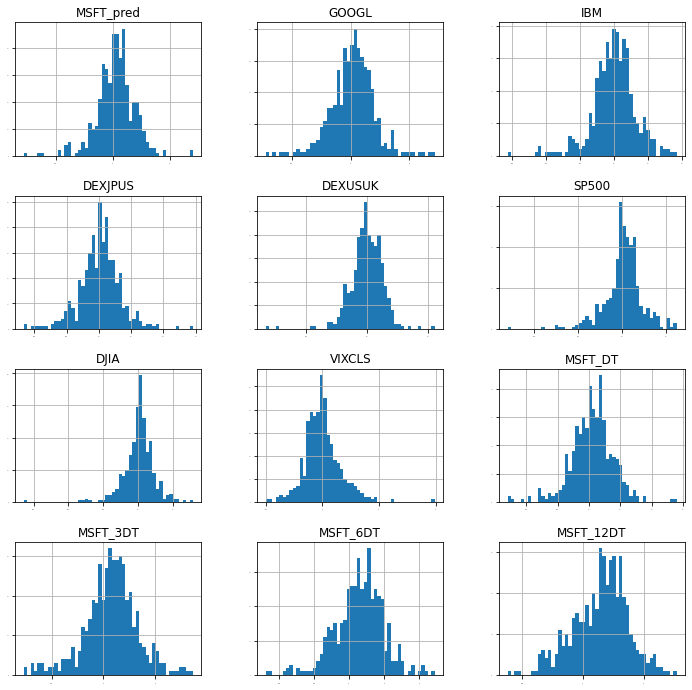

In [20]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

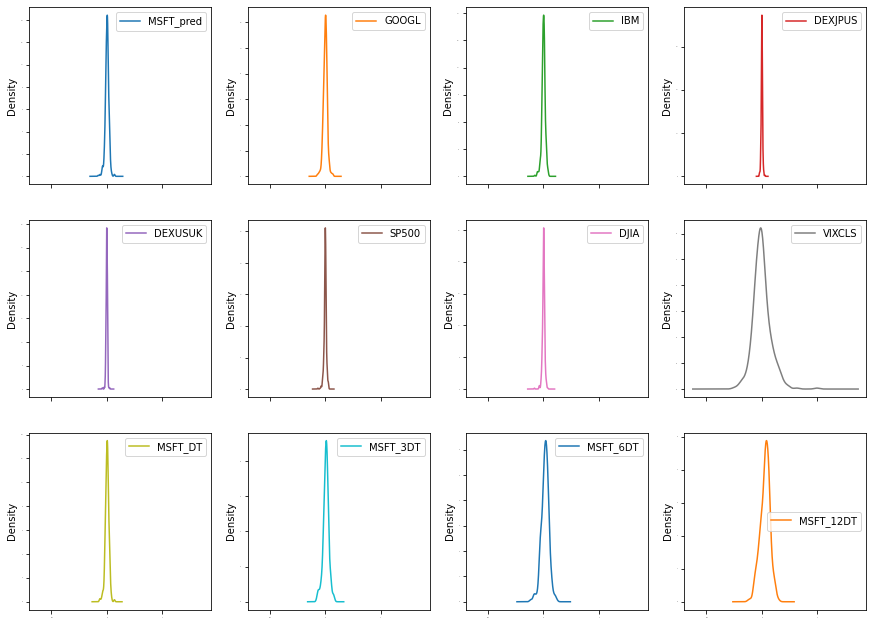

In [21]:
dataset.plot(kind='density', subplots=True, layout=(4, 4),
             sharex=True, legend=True, fontsize=1, figsize=(15, 15))
pyplot.show()


<AxesSubplot: title={'center': 'Correlation Matrix'}>

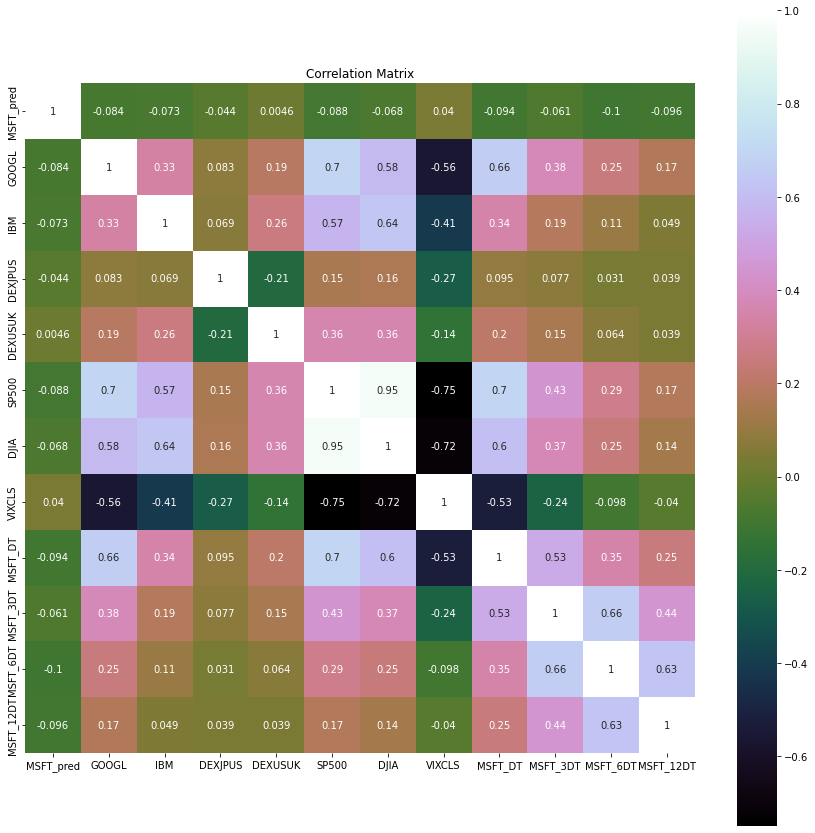

In [22]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

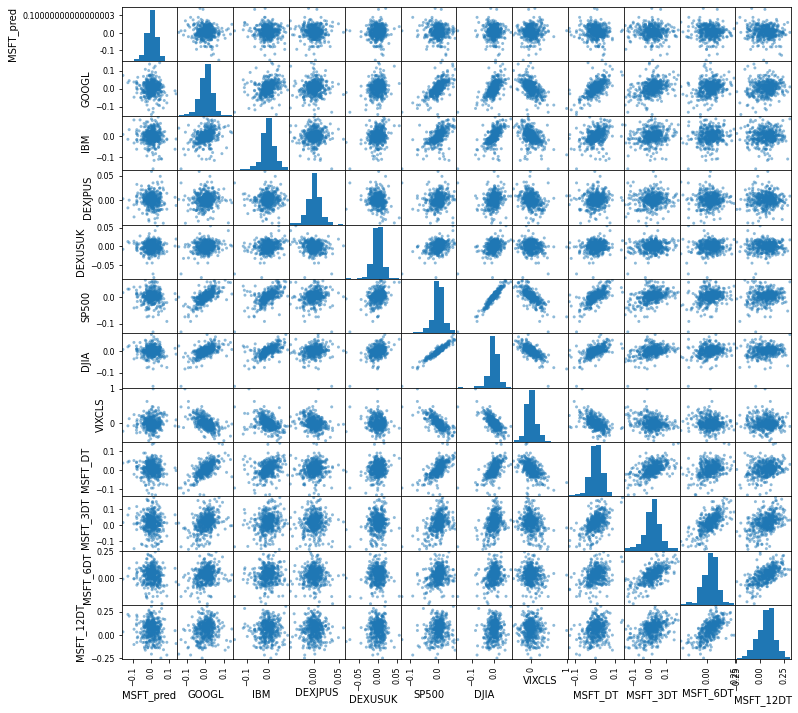

In [23]:
pyplot.figure(figsize=(15, 15))
scatter_matrix(dataset, figsize=(12, 12))
pyplot.show()


### 3.3 Time Series Analysis

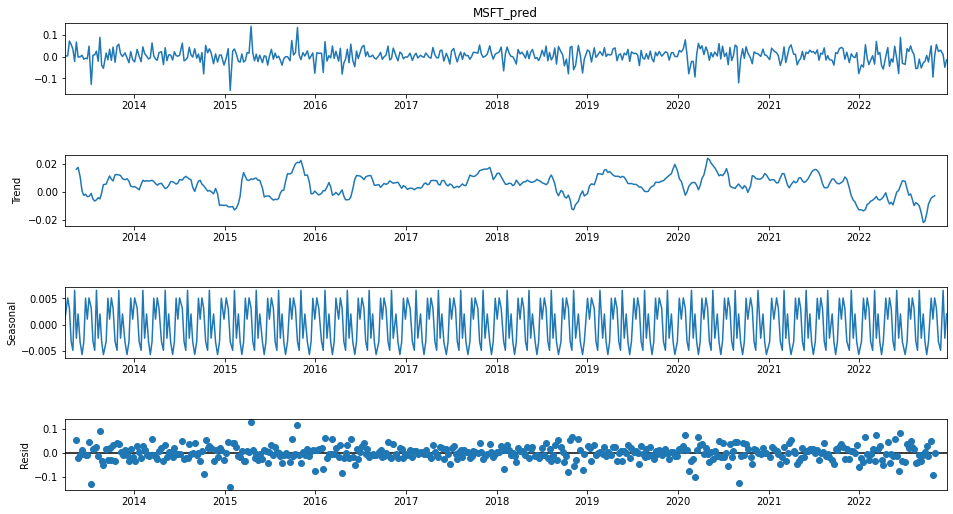

In [24]:
res = sm.tsa.seasonal_decompose(Y, period=12)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()


## Data Preparation

### 4.2 Feature Selection

In [25]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(7,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
MSFT_6DT,4.989
MSFT_12DT,4.289
MSFT_DT,4.140
SP500,3.579
GOOGL,3.275
IBM,2.472
DJIA,2.123


In [26]:
# X.drop(columns=['IBM', 'DEXJPUS', 'DJIA', 'VIXCLS'], inplace=True)
# Y.drop(columns=['IBM', 'DEXJPUS', 'DJIA', 'VIXCLS'], inplace=True)

## Evaluate Algorithms and Models

### 5.1 Train Test Split and Evaluation Metrics

In [27]:
validation_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#Pada kasus ini data tidak dependen pada time series, oleh karena itu train test split harus didasarkan pada sample sequential
#Ini dapat terjadi dengan menyeleksi split point pada list yang berurutan lalu mengobservasi dan membuat 2 dataset yang baru.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]


### 5.2 Test Options and Evaluation Metrics

In [28]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error.
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error'


### 5.3 Compare Models and Algorithms

#### 5.3.1 Machine Learning models-from scikit learn

##### Regression and Tree Regression Algorithms

In [29]:
# Regression and Tree Regression Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))


##### Neural network algorithms

In [30]:
# Neural network algorithms
models.append(('MLP', MLPRegressor()))


##### Ensemble Methods

In [31]:

# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
# models.append(('ETR', ExtraTreesRegressor()))


Once we have selected all the models, we loop over each of them. First we run the K-fold analysis. Next we run the model on the entire training and testing dataset.

In [32]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)

    ## K Fold analysis:

    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    #converted mean square error to positive. The lower the beter
    cv_results = -1 * cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(Y_train, res.predict(X_train))
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(Y_test, res.predict(X_test))
    test_results.append(test_result)

    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(),
                                 cv_results.std(), train_result, test_result)
    print(msg)


LR: 0.001053 (0.000485) 0.000968 0.001414
LASSO: 0.001025 (0.000511) 0.001018 0.001241
EN: 0.001025 (0.000511) 0.001018 0.001241
KNN: 0.001128 (0.000481) 0.000742 0.001792
SVR: 0.001362 (0.000492) 0.001217 0.001588
MLP: 0.001068 (0.000439) 0.001329 0.001353
ABR: 0.001140 (0.000533) 0.000667 0.001512
GBR: 0.001212 (0.000559) 0.000240 0.001692
RFR: 0.001137 (0.000496) 0.000152 0.001622


### K Fold Result

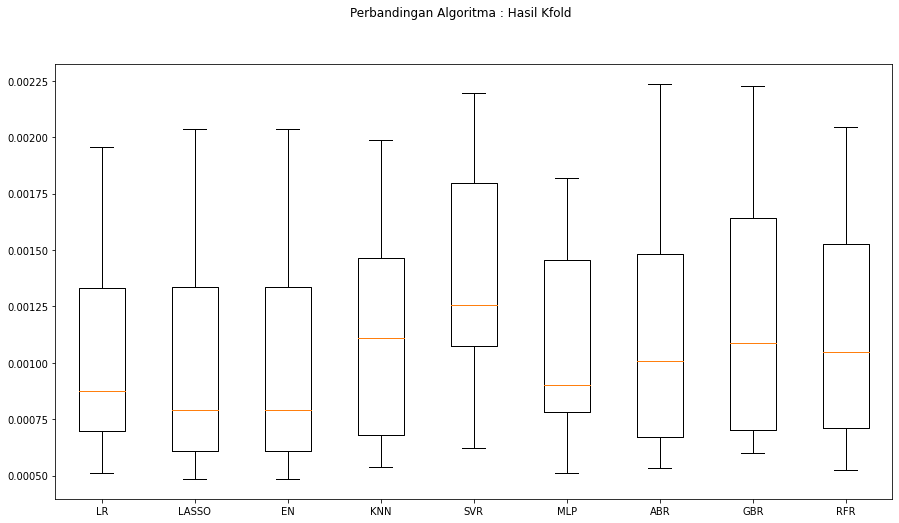

In [33]:
fig = pyplot.figure()
fig.suptitle('Perbandingan Algoritma : Hasil Kfold')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15, 8)
pyplot.show()


##### Training and Test Error

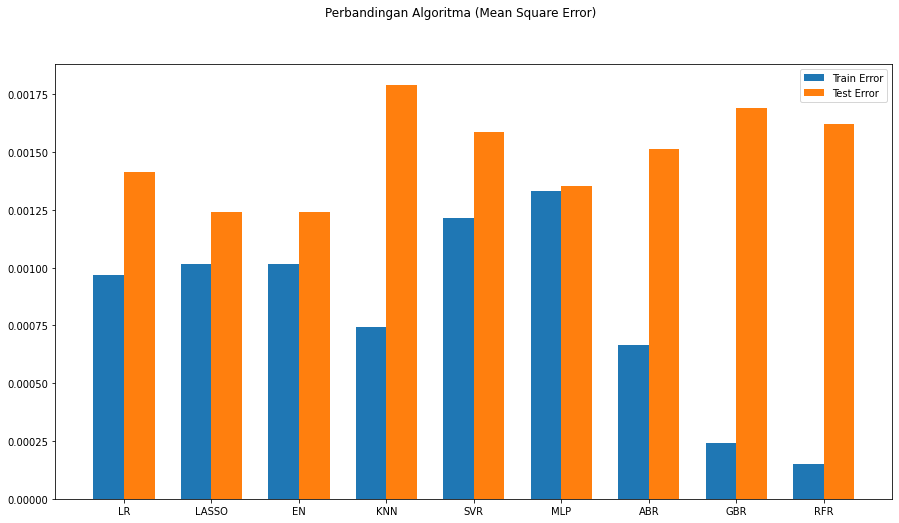

In [34]:
# Perbandingan algoritma
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Perbandingan Algoritma (Mean Square Error)')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15, 8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()


In [35]:
# date_column = dataset.index.to_pydatetime()

# names = cycle(['Original close price',
#               'Train predicted close price', 'Test predicted close price'])

# plotdf = pd.DataFrame({'date': close_stock['date_column'],
#                        'original_close': close_stock['close'],
#                       'train_predicted_close': trainPredictPlot.reshape(1, -1)[0].tolist(),
#                        'test_predicted_close': testPredictPlot.reshape(1, -1)[0].tolist()})

# fig = px.line(plotdf, x=plotdf['date'], y=[plotdf['original_close'], plotdf['train_predicted_close'],
#                                            plotdf['test_predicted_close']],
#               labels={'value': 'Stock price', 'date': 'Date'})
# fig.update_layout(title_text='Comparision between original close price vs predicted close price',
#                   plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
# fig.for_each_trace(lambda t:  t.update(name=next(names)))

# fig.update_xaxes(showgrid=False)
# fig.update_yaxes(showgrid=False)
# fig.show()

### 5.3.1 Time Series based models-ARIMA and LSTM

#### Time Series Model - ARIMA Model

In [36]:
X_train_ARIMA = X_train
X_test_ARIMA = X_test
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len(X)


In [37]:
modelARIMA = ARIMA(Y_train, exog=X_train_ARIMA, order=(1, 0, 0))
model_fit = modelARIMA.fit()


In [38]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(
    start=tr_len - 1, end=to_len - 1, exog=X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test, predicted)
error_Test_ARIMA


0.0014357018550406218

#### LSTM Models

In [39]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [40]:
# Lstm Network
def create_LSTMmodel(neurons=12, learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(
        X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model


LSTMModel = create_LSTMmodel(12, learn_rate=0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(
    X_test_LSTM, Y_test_LSTM), epochs=300, batch_size=75, verbose=0, shuffle=False)



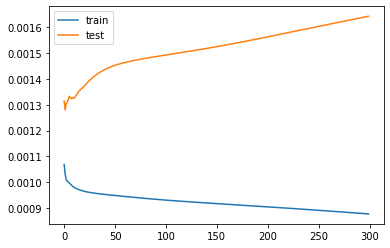

In [41]:
#Visual plot to check if the error is reducing
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [42]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

3/3 [==============================] - 0s 7ms/step


In [43]:
## Append to previous result
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)

train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)

names.append("ARIMA")
names.append("LSTM")


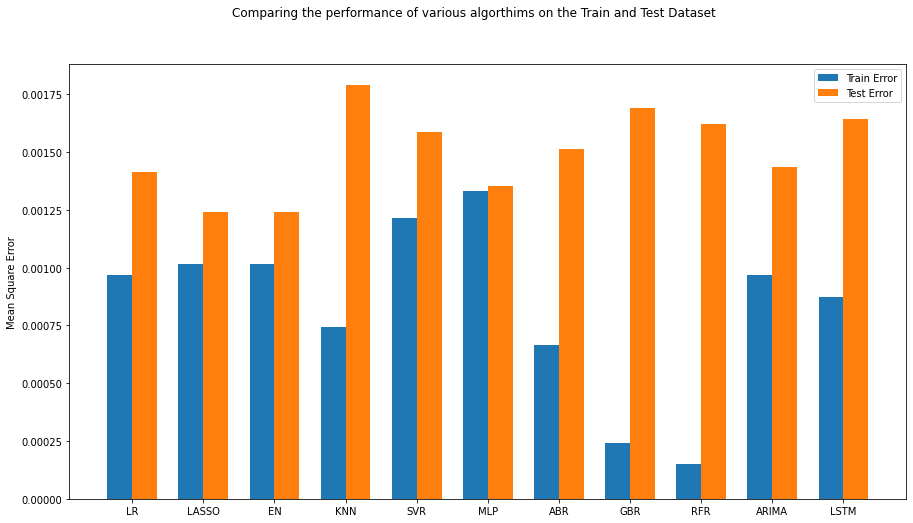

In [44]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle(
    'Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15, 8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()


## 6. Model Tuning and Grid Search

In [45]:
#Grid Search for ARIMA Model
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()
    modelARIMA = ARIMA(endog=Y_train, exog=X_train_ARIMA, order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error

# evaluate combinations of p, d and q values for an ARIMA model


def evaluate_models(p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima_model(order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order, mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))


# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)


ARIMA(0, 0, 0) MSE=0.0009681
ARIMA(0, 0, 1) MSE=0.0009678
ARIMA(0, 1, 0) MSE=0.0012149
ARIMA(0, 1, 1) MSE=0.0009967
ARIMA(1, 0, 0) MSE=0.0009680
ARIMA(1, 0, 1) MSE=0.0009681
ARIMA(1, 1, 0) MSE=0.0011611
ARIMA(1, 1, 1) MSE=0.0009964
ARIMA(2, 0, 0) MSE=0.0009617
ARIMA(2, 0, 1) MSE=0.0009618
ARIMA(2, 1, 0) MSE=0.0010965
ARIMA(2, 1, 1) MSE=0.0011031
Best ARIMA(2, 0, 0) MSE=0.0009617


## 7. Finalise the Model

### 7.1 Results on the Test Dataset

In [46]:
# prepare model
modelARIMA_tuned = ARIMA(endog=Y_train, exog=X_train_ARIMA, order=[2, 0, 1])
model_fit_tuned = modelARIMA_tuned.fit()


In [47]:
# estimate accuracy on validation set
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

0.0014357018550406218


### 7.2 Save Model for Later Use

In [48]:
# Save Model Using Pickle
# from pickle import dump
# from pickle import load

# # save the model to disk
# filename = 'finalized_model.sav'
# dump(model_fit_tuned, open(filename, 'wb'))
